# Exploratory  Analysys - **EDA**
## MOOCs (**M**assive **O**nline **O**pen **C**ourses)

![Header](_src/online-6204349_640.jpg)

In [134]:
# Importamos las librerías requeridas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions.plot_functions as pf
import missingno as msno
import re

In [135]:
# Cargamos los datasets
coursera_courses = pd.read_csv('/home/osanchezd/Downloads/Coursera_courses.csv')
edx_courses = pd.read_csv('/home/osanchezd/Downloads/edx_courses.csv')
udemy_courses = pd.read_csv('/home/osanchezd/Downloads/udemy_courses.csv')

# Cargamos el archivo `Coursera_reviews`
coursera_reviews = pd.read_csv('/home/osanchezd/Downloads/Coursera_reviews.csv')

Observamos los primeros renglones de cada dataset:

In [136]:
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [137]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [138]:
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [139]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


Imprimimos df.info() para obtener las columnas, cantidad de valores nulos y dtype de cada dataset:

In [140]:
coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [141]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [142]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [143]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


De la información obtenida arriba, nos percatamos que todos los datasets contienen diferentes números de columnas y renglones:

In [144]:
print(f'Tamaño del dataset de coursera: {coursera_courses.shape}')
print(f'Tamaño del dataset de edx: {edx_courses.shape}')
print(f'Tamaño del dataset de udemy: {udemy_courses.shape}')
print(f'Tamaño del dataset de coursera_reviews: {coursera_reviews.shape}')

Tamaño del dataset de coursera: (623, 4)
Tamaño del dataset de edx: (975, 16)
Tamaño del dataset de udemy: (3678, 12)
Tamaño del dataset de coursera_reviews: (1454711, 5)


Ahora ejecutamos un df.describe() para obtener datos estadísticos de nuestros datasets

In [145]:
coursera_courses.describe()

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [146]:
edx_courses.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"97,291",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",Course Outline:,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [147]:
udemy_courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [148]:
coursera_reviews.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


## Analizando la presencia de valores nulos

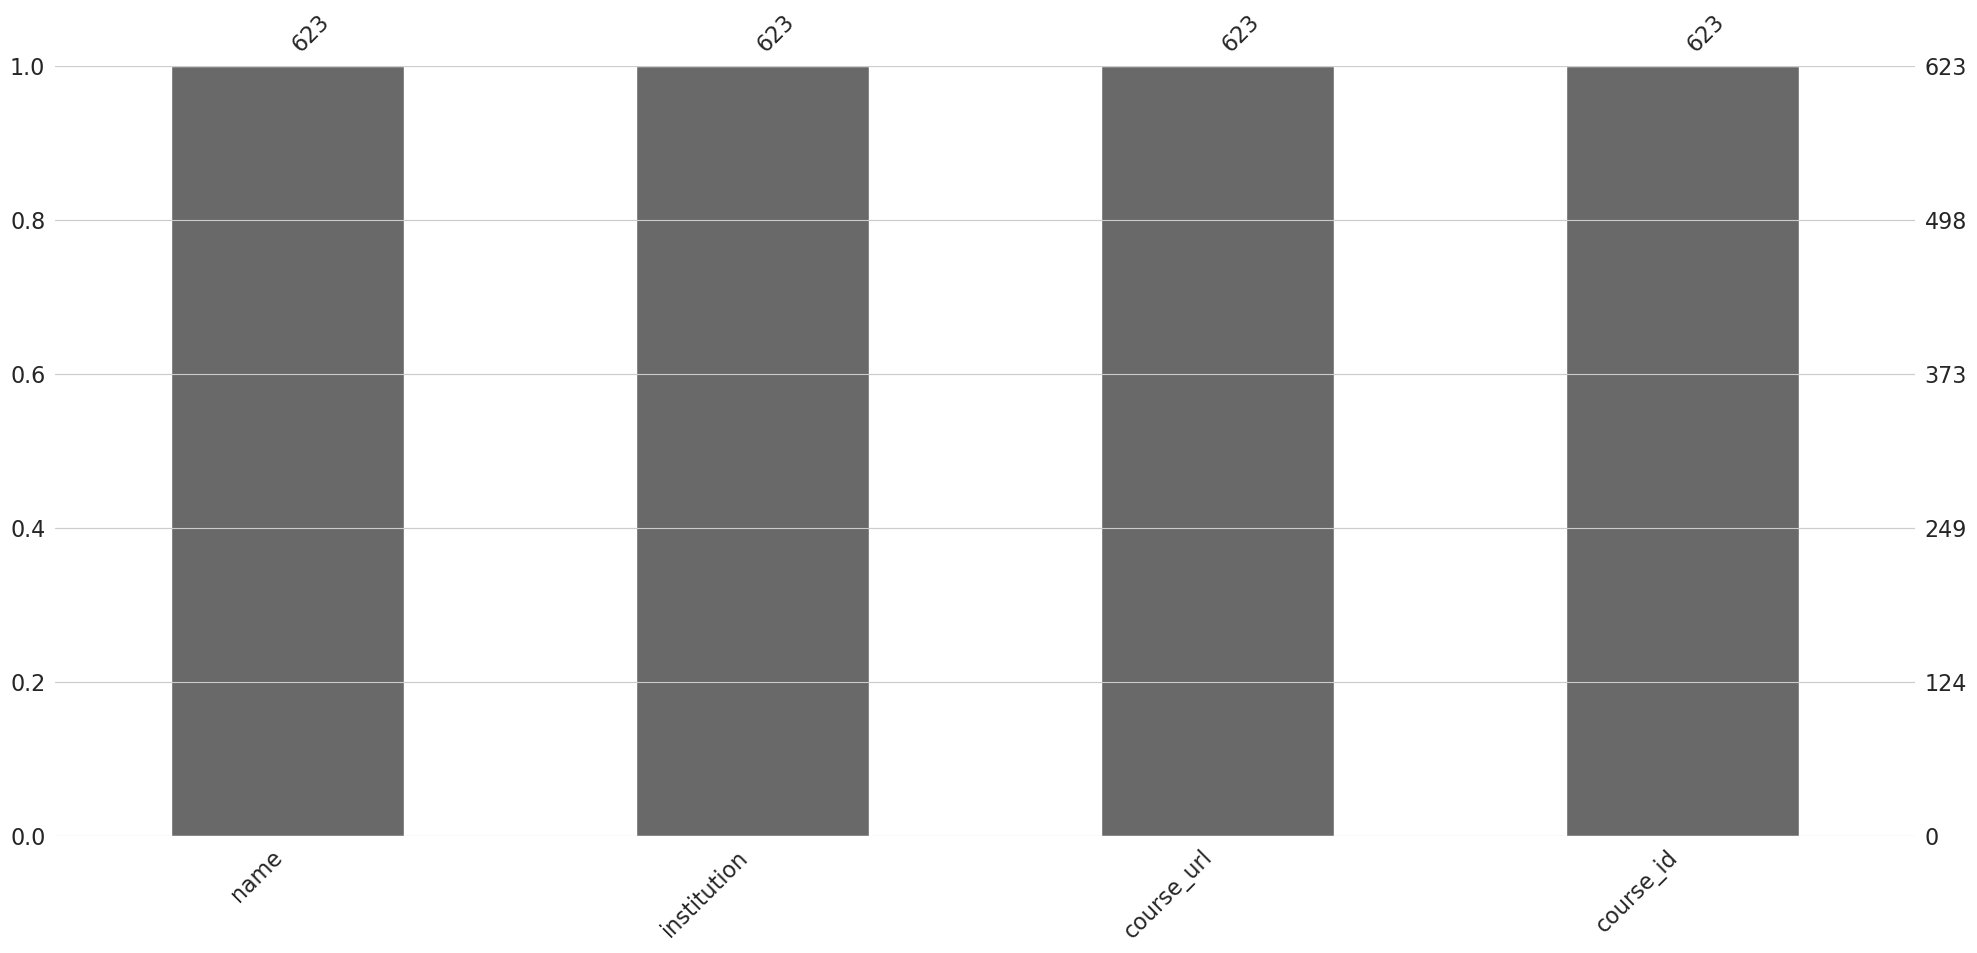

In [149]:
msno.bar(coursera_courses)
plt.show()

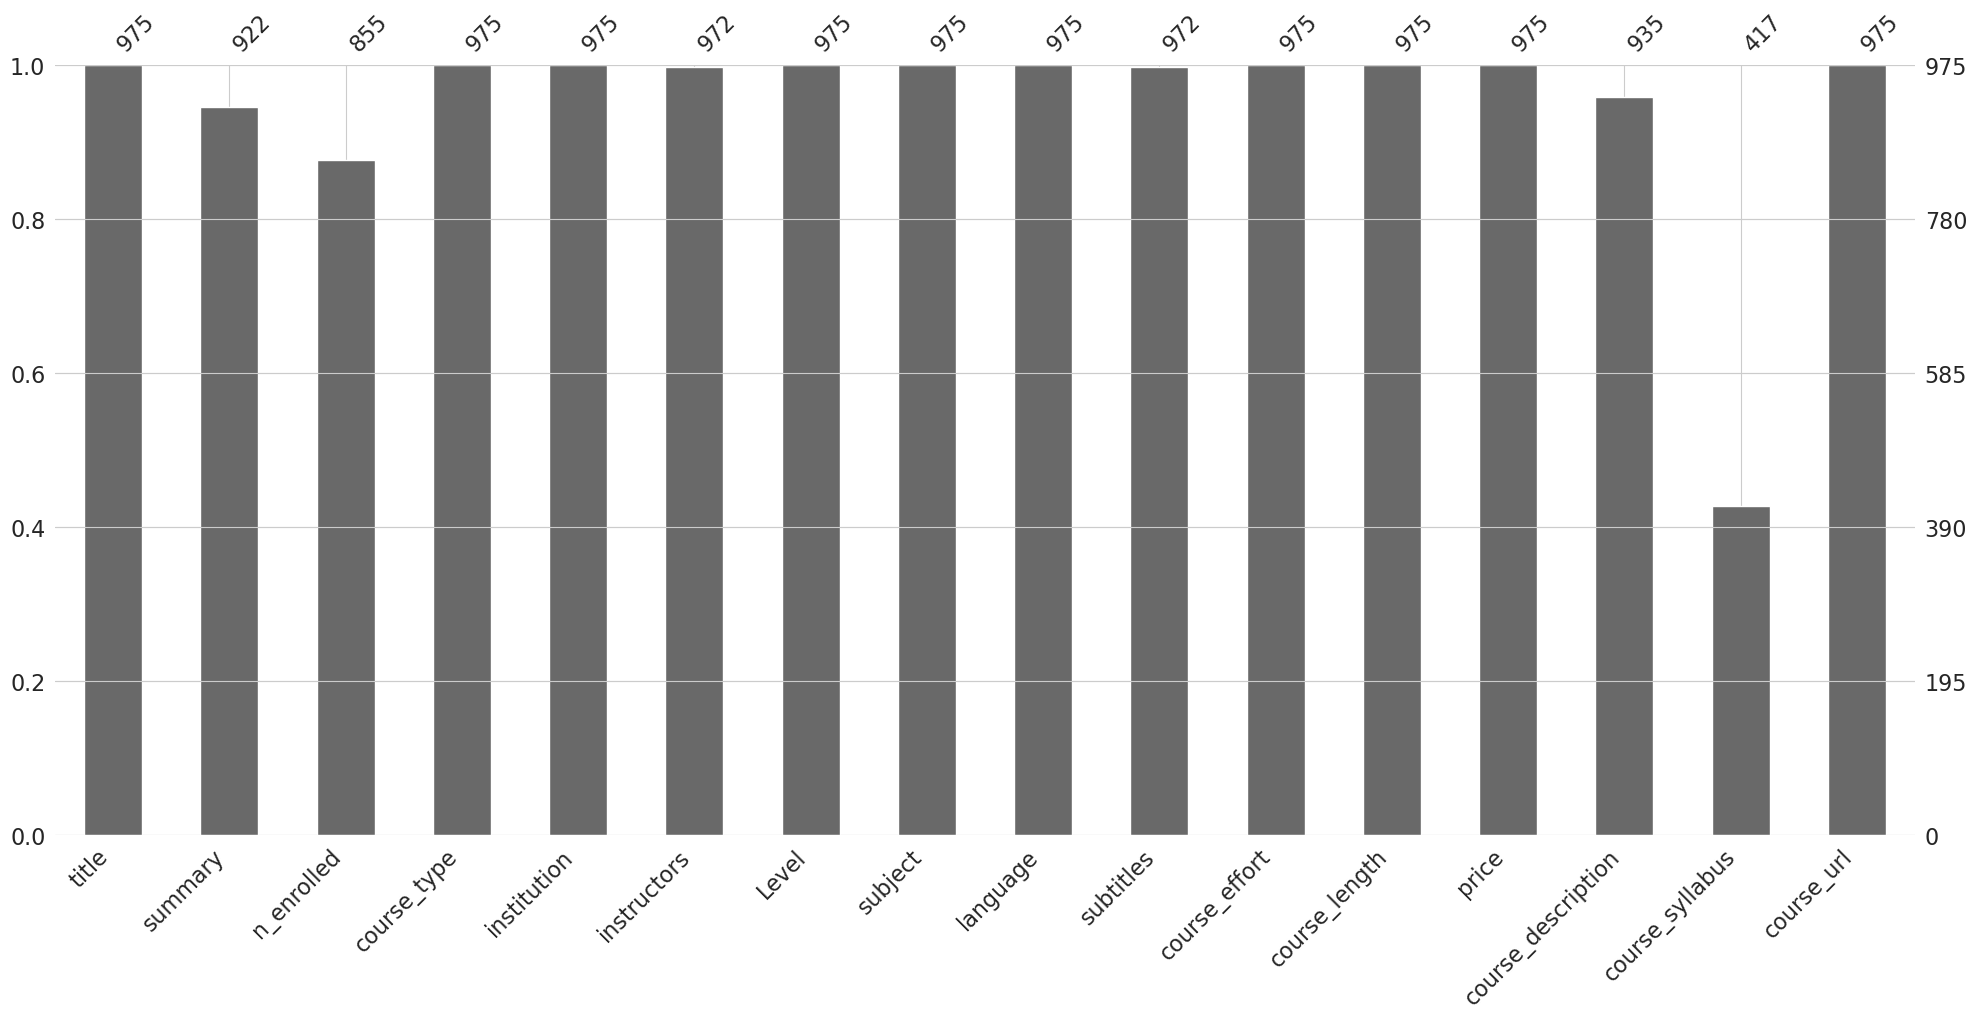

In [150]:
msno.bar(edx_courses)
plt.show()

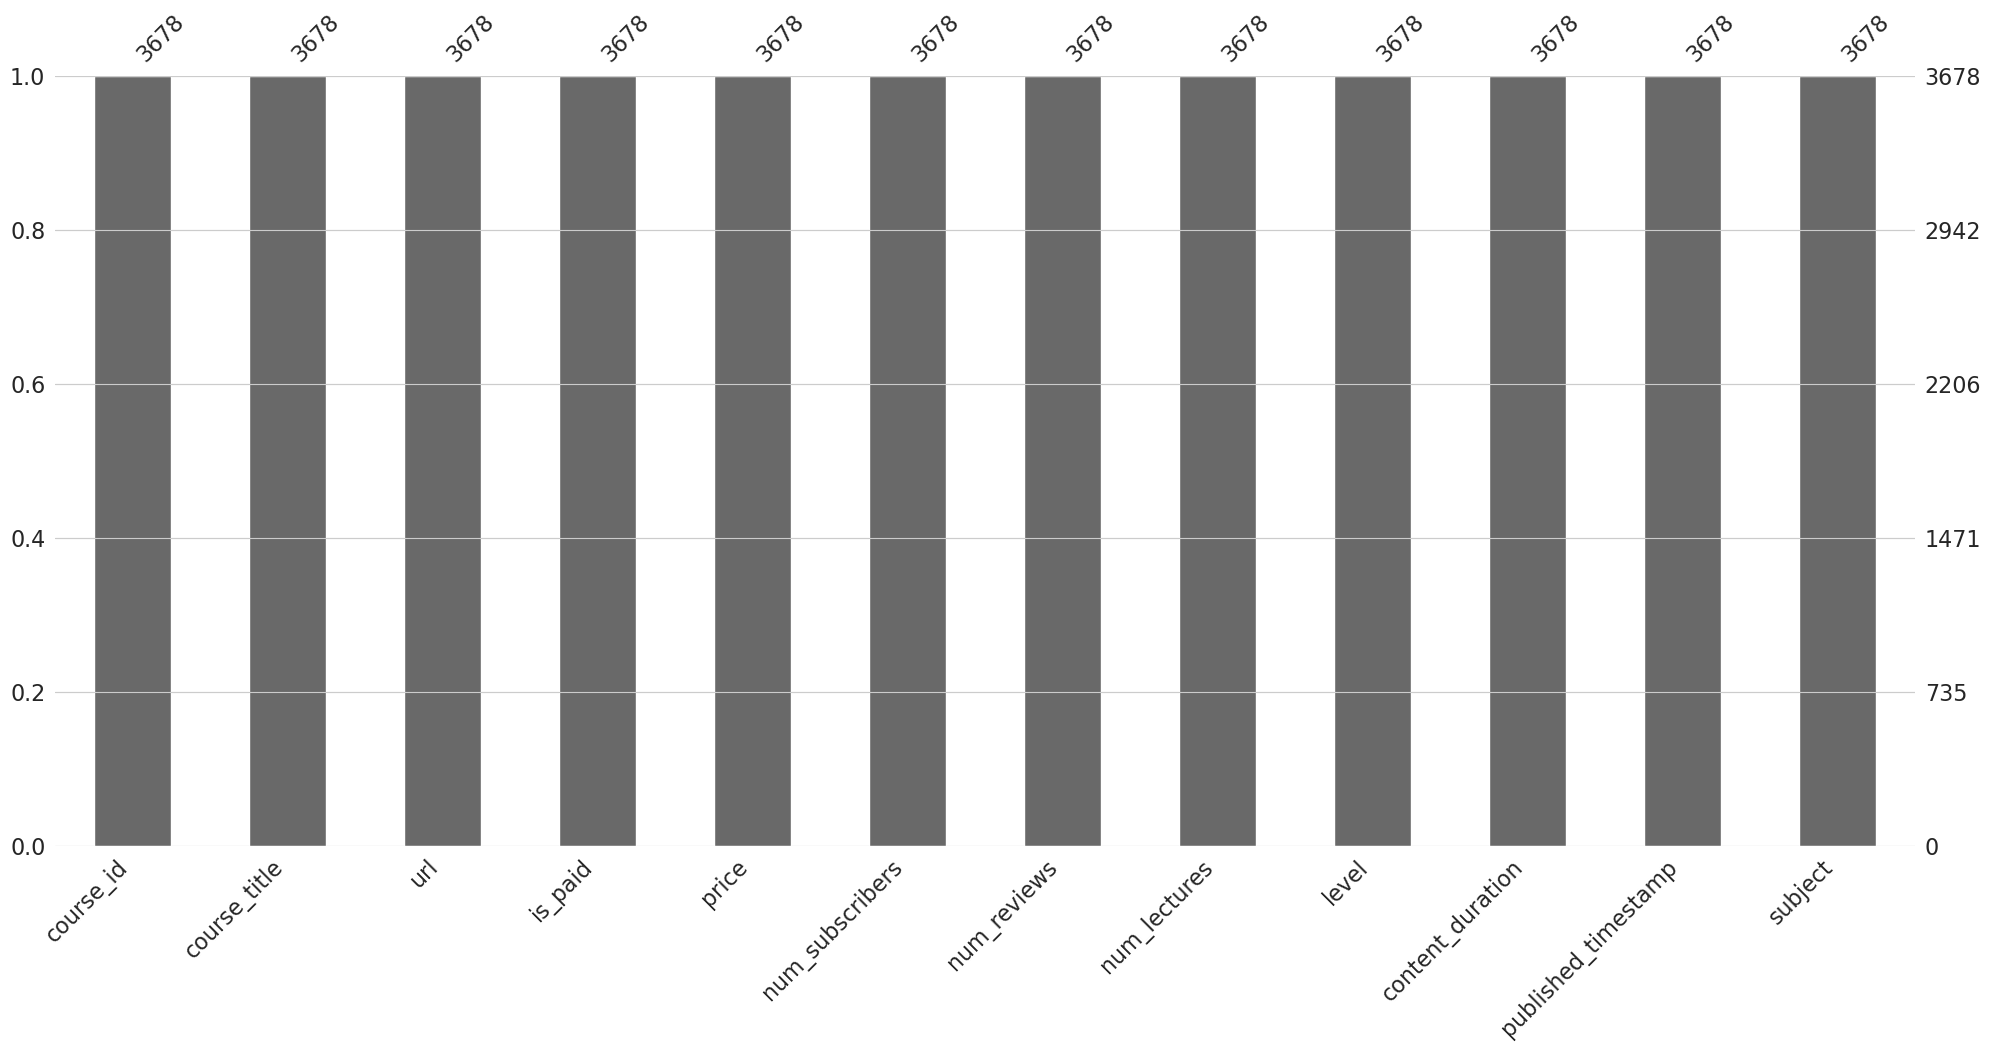

In [151]:
msno.bar(udemy_courses)
plt.show()

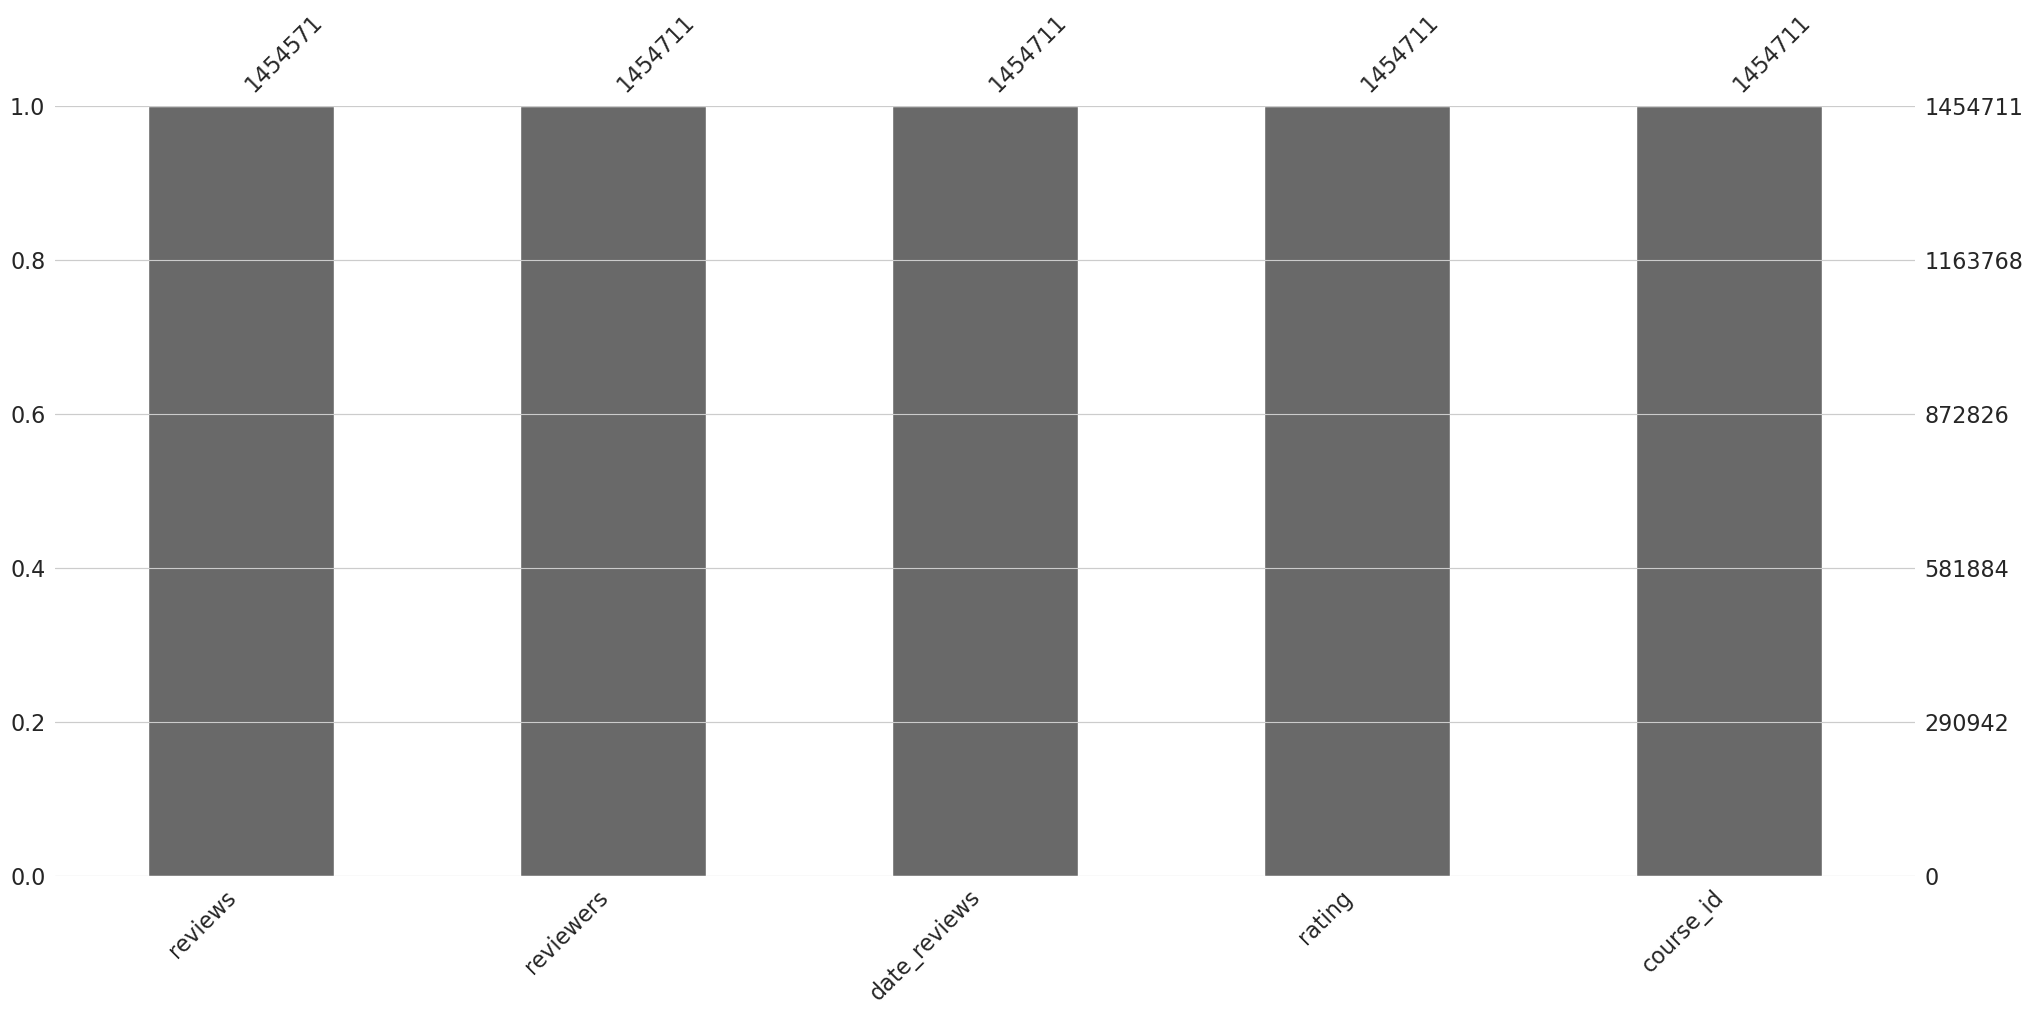

In [152]:
msno.bar(coursera_reviews)
plt.show()

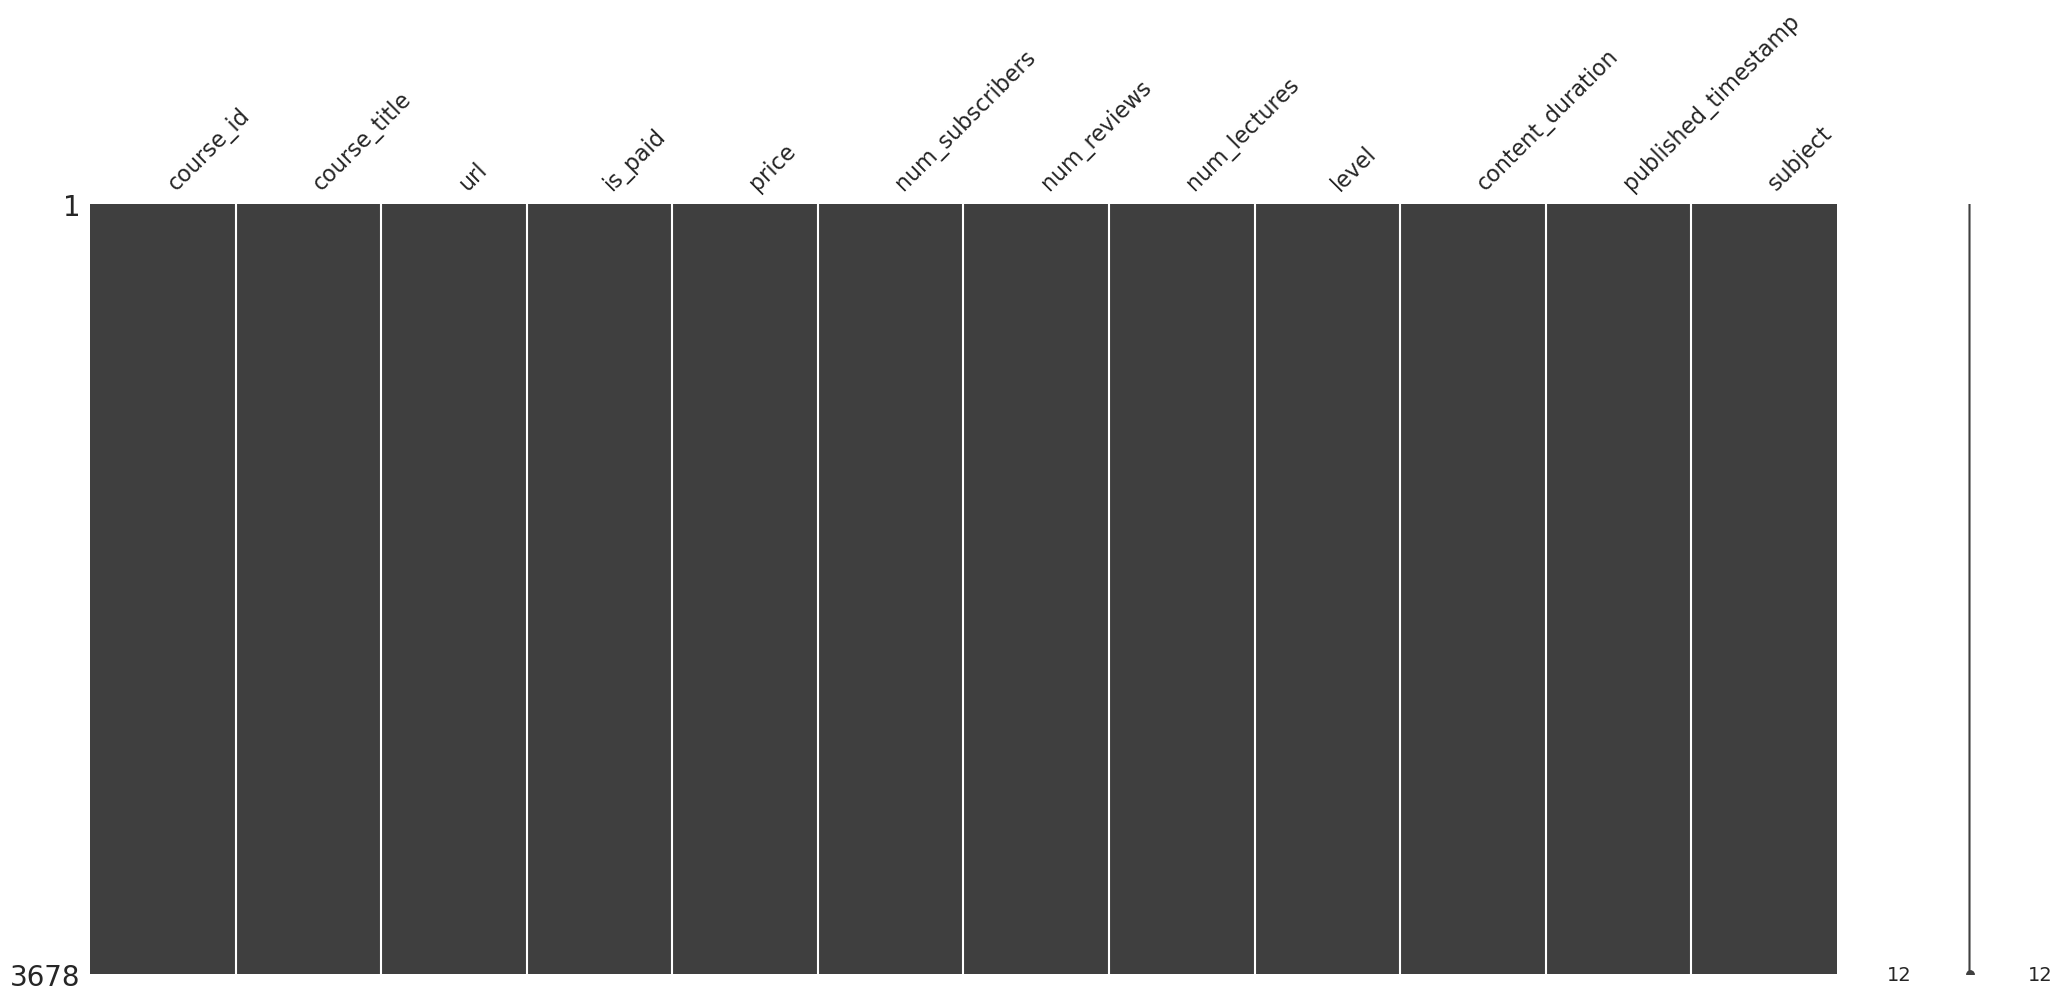

In [153]:
msno.matrix(udemy_courses)
plt.show()

Del análisis de la visualización de valores faltantes, se observa que las columnas `summary`, `n_enrolled`, `instructors` y subtitles del dataset **edx_courses**, presentan valores nulos.

In [154]:
edx_courses.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [155]:
print(f'El porcentaje de valores faltantes de la columna "summary" es de: {round(edx_courses["summary"].isna().sum() / edx_courses.shape[0] * 100, 2)}%')

El porcentaje de valores faltantes de la columna "summary" es de: 5.44%


In [156]:
print(f'El porcentaje de valores faltantes de la columna "n_enrolled" es de: {round(edx_courses["n_enrolled"].isna().sum() / edx_courses.shape[0] * 100, 2)}%')

El porcentaje de valores faltantes de la columna "n_enrolled" es de: 12.31%


In [157]:
print(f'El porcentaje de valores faltantes de la columna "instructors" es de: {round(edx_courses["instructors"].isna().sum() / edx_courses.shape[0] * 100, 2)}%')

El porcentaje de valores faltantes de la columna "instructors" es de: 0.31%


In [158]:
print(f'El porcentaje de valores faltantes de la columna "subtitles" es de: {round(edx_courses["subtitles"].isna().sum() / edx_courses.shape[0] * 100, 2)}%')

El porcentaje de valores faltantes de la columna "subtitles" es de: 0.31%


## Eligiendo el dataset para obtener los insights

Nuestro objetivo es *segmentar el nivel de ventas según:*
- precio
- idioma
- nivel
- rating

De acuerdo a los datos requeridos, y a las columnas presentes en nuestros datasets, si bien todas las columnas presentan datos importantes, nos enfocaremos en los siguientes (sin dejar de lado el resto), para cumplir con el objetivo arriba marcado:

`edx_courses`, ya que presenta 4 de las 4 columnas para realizar la segmentación (precio, título, idioma y nivel). Así mismo, haremos uso de la columna `n_enrolled`, para obtener el precio total de acuerdo a la siguiente fórmula: el *ingreso_total = n_enrolled * price*.

`udemy_courses` ya que cuenta 3 de las 4 columnas para realizar la segmentación (precio, título y nivel). Así mismo, haremos uso de la columna `num_subscribers`, para obtener el precio total de acuerdo a la siguiente fórmula: *ingreso_total = num_subscribers * price*.

`coursera_courses`, utilizaremos las columnas course_id y name, realizaremos un join (utilizando la columna `course_id`) con el dataset `coursera_review`, para analizar el rating de los cursos en esta plataforma.

## Analizando el dataset `ed_courses`
A través del análisis de las columnas: precio, título, idioma y nivel

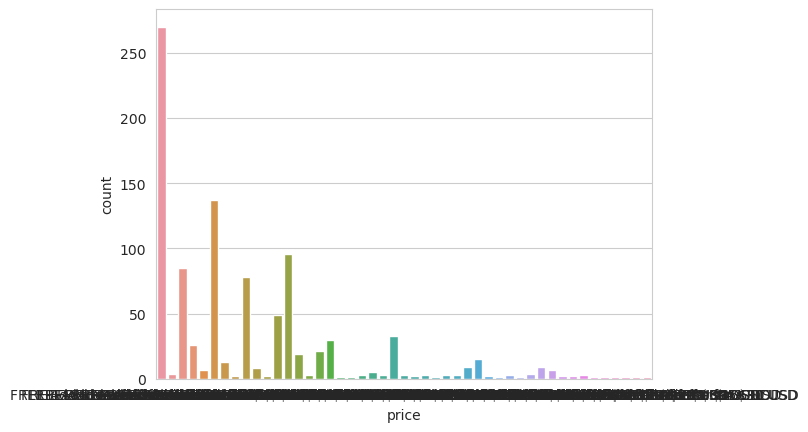

In [159]:
# Graficamos la columna `price`
sns.countplot(x='price', data=edx_courses)
plt.show()

In [160]:
edx_courses['price'].head()

0     FREE-Add a Verified Certificate for $49 USD
1     FREE-Add a Verified Certificate for $49 USD
2     FREE-Add a Verified Certificate for $90 USD
3    FREE-Add a Verified Certificate for $199 USD
4    FREE-Add a Verified Certificate for $249 USD
Name: price, dtype: object

Como podemos observar, en la columna `price` tenemos valores en formato *str*. En las siguientes líneas de código, daremos el tratamiento para, extraer el precio, eliminando el símbolo `$` y convirtiendo al tipo `float` el *str* obtenido de la extracción

In [161]:
# Códigos para estructura (Borrar al finalizar)
# ejemplo = 'La casa cuesta $500 pesos'
# oscar = re.findall(r'[0-9]+', ejemplo)
# print(oscar)

In [162]:
price_course = edx_courses['price'].str.split(" ", expand=True)

In [163]:
price_course.head()

,0,1,2,3,4,5,6
0,FREE-Add,a,Verified,Certificate,for,$49,USD
1,FREE-Add,a,Verified,Certificate,for,$49,USD
2,FREE-Add,a,Verified,Certificate,for,$90,USD
3,FREE-Add,a,Verified,Certificate,for,$199,USD
4,FREE-Add,a,Verified,Certificate,for,$249,USD


In [164]:
# Con esta línea de código, procedemos a separar el signo `$` de la cantidad numérica
price_sep = price_course[5].str.split("", n=2, expand=True)

In [165]:
# Verificamos la correcta separación del signo `$` de la cantidad numérica
print(price_sep)

    0   1    2
0       $   49
1       $   49
2       $   90
3       $  199
4       $  249
..  .. ..  ...
970     $   25
971     $  139
972     $  139
973     $   25
974     $   79

[975 rows x 3 columns]


In [166]:
# Revisamos el tipo de dato de los valores numéricos
price_sep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       975 non-null    object
 1   1       975 non-null    object
 2   2       975 non-null    object
dtypes: object(3)
memory usage: 23.0+ KB


Nuestros datos numéricos están en formato `str`, procedemos a convertirlos al tipo `float`:

In [167]:
price_int = price_sep[2].astype(float)

In [168]:
price_int.info()

<class 'pandas.core.series.Series'>
RangeIndex: 975 entries, 0 to 974
Series name: 2
Non-Null Count  Dtype  
--------------  -----  
975 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


Observamos que ahora, los datos de precio, están libres del signo `$` y ahora son del tipo `float`.

Ahora, procedemos a agregar nuestra columna con los datos numéricos tipo `float` a nuestro dataset original:

In [169]:
edx_courses['price_int'] = price_int

Vamos a verificar la correcta inclusión de la columna `price_int`:

In [170]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price_int
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249.0


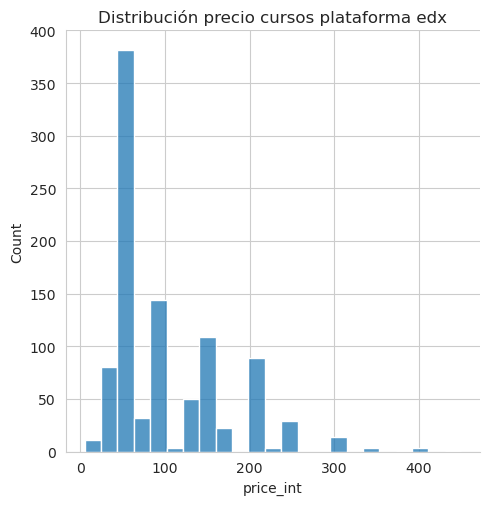

In [171]:
# Graficamos la distribución de los precios
sns.displot(x='price_int', data=edx_courses)
plt.title('Distribución precio cursos plataforma edx')
plt.show()

Ahora procedemos a crear nuestra columna *ingreso_total = n_enrolled * price*:

In [175]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price_int
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249.0


In [227]:
# Como primer paso convertimos la columna `n_enrolled` a int
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',', '.')

In [228]:
# Convertimos a valores numéricos nuestros datos
edx_courses['n_enrolled_num'] = pd.to_numeric(edx_courses['n_enrolled'], downcast='integer')

In [229]:
edx_courses['n_enrolled_num'][0] * edx_courses['price_int'][0]

6124020.0

In [231]:
edx_courses['ingreso_total'] = edx_courses['n_enrolled_num'] * edx_courses['price_int']

In [232]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price_int,n_enrolled_num,ingreso_total
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49.0,124980.0,6124020.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49.0,293864.0,14399336.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90.0,2442271.0,219804390.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199.0,129555.0,25781445.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249.0,81140.0,20203860.0


In [ ]:
# edx_courses['price'].unique()

In [ ]:
# edx_courses.groupby(by=['title']).sum()

In [ ]:
# edx_courses.groupby(by=['language']).sum()

In [ ]:
# edx_courses.groupby(by=['Level']).sum()['n_enrolled']

## Ahora creamos la columna *ingreso_total = num_subscribers * price*, ahora aplicados al dataset de **udemy**.

Es importante observar que, en este caso, que las columnas `price` y `num_subscribers` son del tipo `int64`, por lo que, procedemos a la creación de la columna.

In [236]:
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [237]:
udemy_courses['ingreso_total'] = udemy_courses['price'] * udemy_courses['num_subscribers']

In [238]:
# Verificamos la correcta creación de la columna `ingreso_total`
udemy_courses.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,ingreso_total
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200


In [286]:
udemy_courses['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [240]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
 12  ingreso_total        3678 non-null   int64  
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 348.5+ KB


## Ahora procedemos a realizar lo siguiente:
del dataset `coursera_courses`, utilizaremos las columnas course_id y name, realizaremos un join (utilizando la columna `course_id`) con el dataset `coursera_review`, para analizar el rating de los cursos en esta plataforma.

In [246]:
# Revisamos los primeros 5 renglones de cada dataset en cuestión
coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [247]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [241]:
# Realizamos el join de los datasets de coursera
coursera_full = pd.merge(coursera_courses, coursera_reviews, how='inner', on='course_id')

In [248]:
coursera_full.head()

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,By Deleted A,"Mar 18, 2017",1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,By Bruno C,"Nov 09, 2015",1
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"I just started week 3 , I have to admit that I...",By Fadi,"Apr 15, 2019",1
3,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This course is absolute garbage. You get no f...,By Mathew L,"Sep 25, 2015",1
4,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"However good the material and lectures may be,...",By Rui C,"Dec 12, 2015",1


In [242]:
coursera_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454711 entries, 0 to 1454710
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   name          1454711 non-null  object
 1   institution   1454711 non-null  object
 2   course_url    1454711 non-null  object
 3   course_id     1454711 non-null  object
 4   reviews       1454571 non-null  object
 5   reviewers     1454711 non-null  object
 6   date_reviews  1454711 non-null  object
 7   rating        1454711 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 99.9+ MB


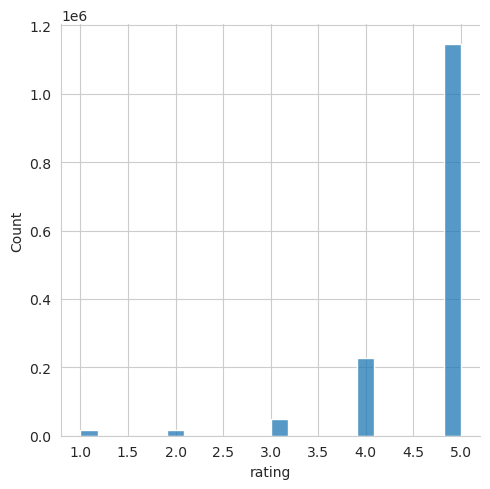

In [249]:
# Visualicemos la distribución de los ratings para este dataset
sns.displot(x='rating', data=coursera_full)
plt.show()

In [275]:
print(f'El porcentaje de reviews con valor igual a 5 es de: {round(coursera_full[coursera_full["rating"] == 5].shape[0] / coursera_full["rating"].shape[0], 2) * 100} %')

El porcentaje de reviews con valor igual a 5 es de: 79.0 %


Observamos que el porcentaje de review con valor de 5 para los cursos, es de aproximadamente 89 %.

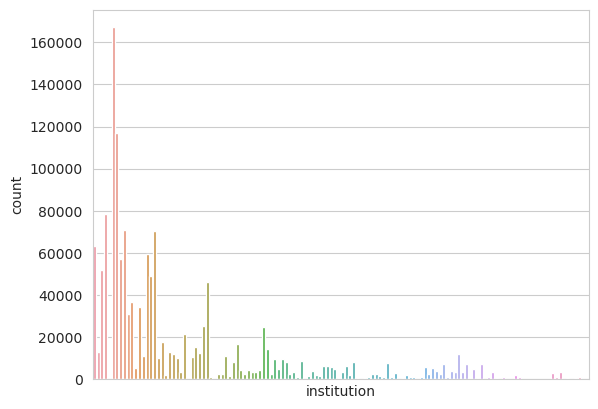

In [257]:
# Visualicemos la distribución de los ratings para este dataset
sns.countplot(x='institution', data=coursera_full)
plt.xticks([])
plt.show()

In [276]:
len(coursera_full['name'].unique())

603

In [277]:
len(coursera_full['institution'].unique())

132

Observamos que el dataset de coursera cuenta con un total de 603 cursos distintos y 132 instituciones diferentes.

Ahora, con nuestros datasets revisados y transformados, procedemos a guardar una copia de cada uno, para su posterior carga, análisis y presentación, utilizando la herramienta Power BI.

In [278]:
edx_courses.to_csv('/home/osanchezd/Documents/edx_bi')
udemy_courses.to_csv('/home/osanchezd/Documents/udemy_bi')
coursera_full.to_csv('/home/osanchezd/Documents/coursera_bi')

# Wordcloud

A continuación, vamos a generar las palabras clave que más se repiten dentro del título.

## Comenzaremos con la plataforma `coursera`

In [287]:
from wordcloud import WordCloud

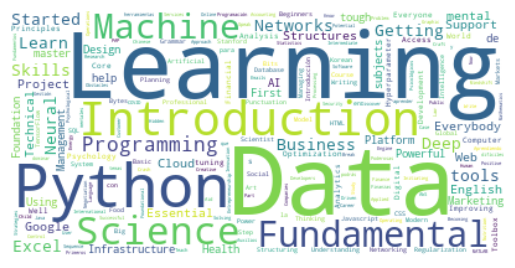

In [305]:
# Creamos nuestra variable
text_coursera = " ".join(title for title in coursera_full['name'])
# Creamos word_count_coursera with text_ed como argumento
word_count_coursera = WordCloud(collocations=False, background_color='white').generate(text_coursera)
# Presentamos en pantalla el Word Count generado
plt.imshow(word_count_coursera, interpolation='bilinear')
plt.axis('off')

# Guardamos nuestra imagen
plt.savefig('coursera_full_word_cloud.png')

plt.show()

# Observamos que las palabras:
- Data
- Learning
- Introduction
- Python
- Machine

entre otras, son las más se repiten dentro de los títulos del dataset de coursera.

## Continuamos con la plataforma `edx`

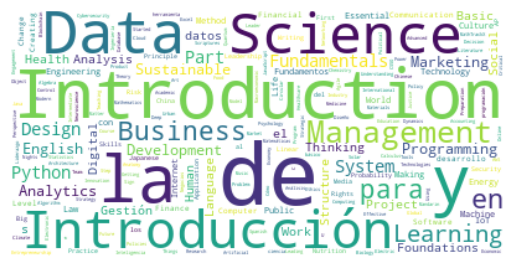

In [306]:
# Creamos nuestra variable
text_edx = " ".join(title for title in edx_courses['title'])
# Creamos word_count_edx with text_ed como argumento
word_count_edx = WordCloud(collocations=False, background_color='white').generate(text_edx)
# Presentamos en pantalla el Word Count generado
plt.imshow(word_count_edx, interpolation='bilinear')
plt.axis('off')

# Guardamos nuestra imagen
plt.savefig('edx_word_cloud.png')

plt.show()

# Observamos que las palabras:
- Introduction
- Data
- Science
- Learning
- Fundamentals

entre otras, son las más se repiten dentro de los títulos del dataset de la plataforma edX.

## Finalizamos con la plataforma `udemy`

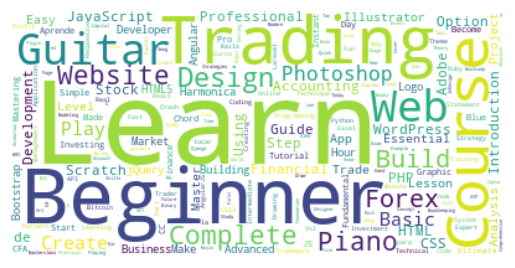

In [307]:
# Creamos nuestra variable
text_udemy = " ".join(title for title in udemy_courses['course_title'])
# Creamos word_count_udemy with text_ed como argumento
word_count_udemy = WordCloud(collocations=False, background_color='white').generate(text_udemy)
# Presentamos en pantalla el Word Count generado
plt.imshow(word_count_udemy, interpolation='bilinear')
plt.axis('off')

# Guardamos nuestra imagen
plt.savefig('udemy_full_word_cloud.png')

plt.show()

# Observamos que las palabras:
- Beginner
- Learn
- Trading
- Design
- Course

entre otras, son las más se repiten dentro de los títulos del dataset de la plataforma udemy.